In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        pass


    def forward(self, x):
        return x

In [54]:
# Dataset and DataLoader setup
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [55]:
# Load the CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                 download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


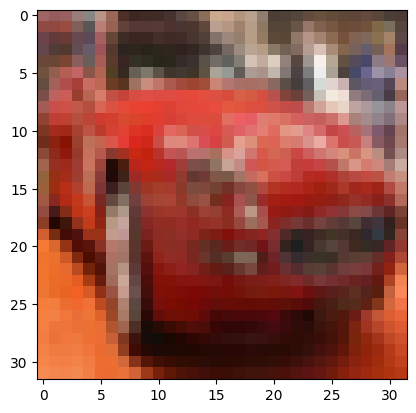

In [56]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[5])

In [58]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=2)


In [59]:
# Initialize the network
model = SimpleCNN()

In [60]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [61]:
# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [62]:
epochs = 100
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0



[1,   100] loss: 2.303
[1,   200] loss: 2.303
[1,   300] loss: 2.303
[1,   400] loss: 2.302
[1,   500] loss: 2.301
[1,   600] loss: 2.301
[1,   700] loss: 2.300
[2,   100] loss: 2.297
[2,   200] loss: 2.296
[2,   300] loss: 2.292
[2,   400] loss: 2.286
[2,   500] loss: 2.275
[2,   600] loss: 2.253
[2,   700] loss: 2.213
[3,   100] loss: 2.139
[3,   200] loss: 2.098
[3,   300] loss: 2.050
[3,   400] loss: 1.999
[3,   500] loss: 1.964
[3,   600] loss: 1.924
[3,   700] loss: 1.892
[4,   100] loss: 1.824
[4,   200] loss: 1.815
[4,   300] loss: 1.767
[4,   400] loss: 1.755
[4,   500] loss: 1.727
[4,   600] loss: 1.697
[4,   700] loss: 1.685
[5,   100] loss: 1.634
[5,   200] loss: 1.627
[5,   300] loss: 1.645
[5,   400] loss: 1.606
[5,   500] loss: 1.616
[5,   600] loss: 1.611
[5,   700] loss: 1.576
[6,   100] loss: 1.555
[6,   200] loss: 1.553
[6,   300] loss: 1.560
[6,   400] loss: 1.527
[6,   500] loss: 1.518
[6,   600] loss: 1.555
[6,   700] loss: 1.532
[7,   100] loss: 1.509
[7,   200] 

In [69]:
# model.load_state_dict(torch.load('simple_cnn_cpu.pth'))

<All keys matched successfully>

In [71]:
import matplotlib.pyplot as plt

# Assuming model and test_loader are already defined and the model is loaded with trained parameters

# Function to evaluate the model
def evaluate_model(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            test_loss += nn.CrossEntropyLoss()(outputs, target).item()  # Sum up batch loss
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / total
    return test_loss, accuracy

In [72]:
# Evaluate the model
test_loss, accuracy = evaluate_model(model, device, test_loader)

print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

Test Loss: 0.0019, Accuracy: 64.46%


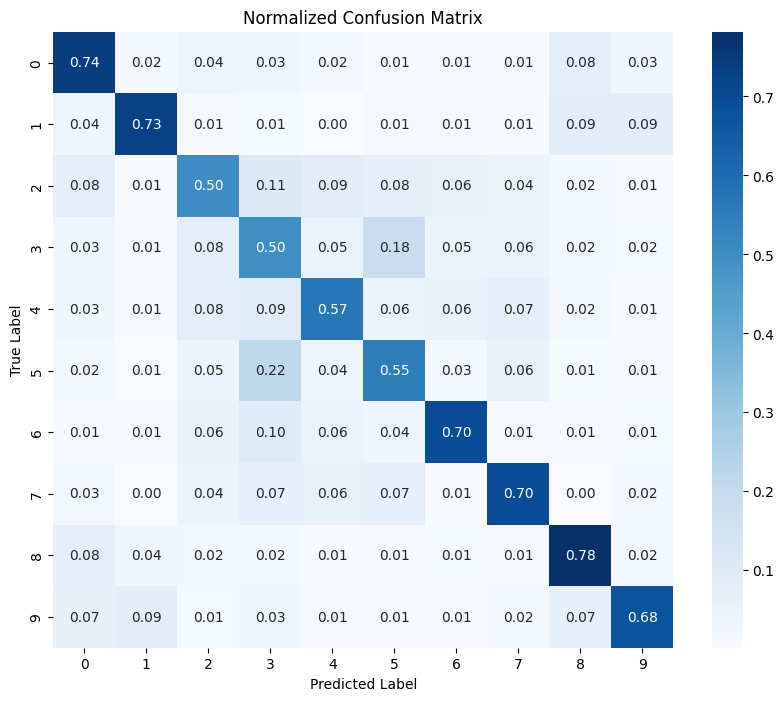

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming model, device, and test_loader are already defined and the model is loaded with trained parameters

def get_all_predictions(model, device, loader):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for data, targets in loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())
    return all_preds, all_labels

# Get all predictions and labels
predictions, labels = get_all_predictions(model, device, test_loader)

# Generate confusion matrix
cm = confusion_matrix(labels, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizing the confusion matrix

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

